##  Homework 11a

  #### 1.  Using the ib3logo.png image, create and display the horizontal edges.

<ipython-input-6-9f3726227451>:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  amg = imageio.imread(url, mode='F').astype(np.uint8)


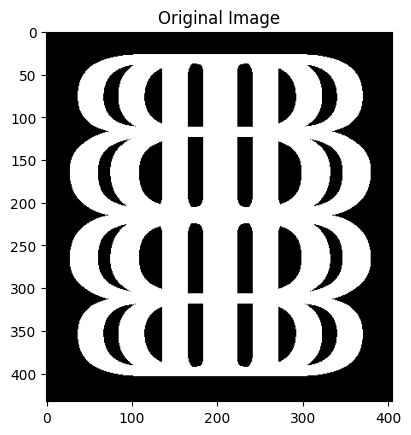

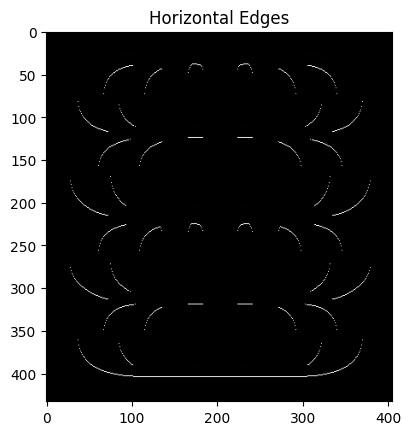

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as nd
import imageio

url = 'https://raw.githubusercontent.com/joefoxva1/CDS468/master/Lectures13_14_15_16_17_18/ib3logo.png'
amg = imageio.imread(url, mode='F').astype(np.uint8)

plt.title('Original Image')
plt.imshow(amg, cmap='gray')
plt.show()

bmg = abs(amg - nd.shift(amg,(1,0),order=0))

plt.title('Horizontal Edges')
plt.imshow(-bmg, cmap='gray')
plt.show()

#### 2. Apply the DoG filter to the ib3logo.png image with sigma1=2 and sigma2=4. Display the beginning and final images.

<ipython-input-3-30f375d72dc0>:14: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  amg = imageio.imread(url, mode='F').astype(np.uint8)


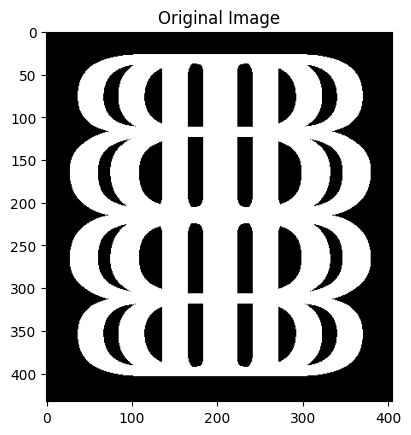

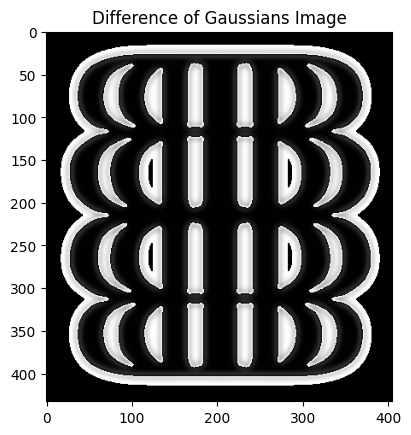

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as nd
import imageio

def DoGFilter(amg, sigma1, sigma2):
    b1 = nd.gaussian_filter(amg, sigma1)
    b2 = nd.gaussian_filter(amg, sigma2)
    answ = b1 - b2
    return answ

url = 'https://raw.githubusercontent.com/joefoxva1/CDS468/master/Lectures13_14_15_16_17_18/ib3logo.png'
amg = imageio.imread(url, mode='F').astype(np.uint8)

plt.title('Original Image')
plt.imshow(amg, cmap='gray')
plt.show()

bmg = DoGFilter(amg, 2, 4)

plt.title('Difference of Gaussians Image')
plt.imshow(bmg, cmap='gray')
plt.show()


#### 3.  Apply the Harris filter to the ib3logo.png image. Display the beginning and final images.

In [4]:
def Harris(indata, alpha=0.2):
    Ix = nd.sobel(indata, 0)
    Iy = nd.sobel(indata, 1)
    Ix2 = Ix**2;     Iy2 = Iy**2
    Ixy = abs(Ix * Iy)
    Ix2 = nd.gaussian_filter(Ix2, 3)
    Iy2 = nd.gaussian_filter(Iy2, 3)
    Ixy = nd.gaussian_filter(Ixy, 3)
    detC = Ix2 * Iy2 - 2 * Ixy
    trC = Ix2 + Iy2
    R = detC - alpha * trC**2
    return R

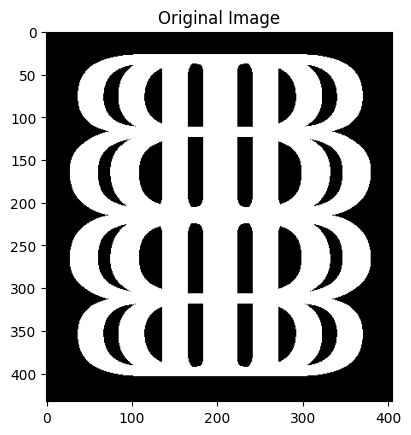

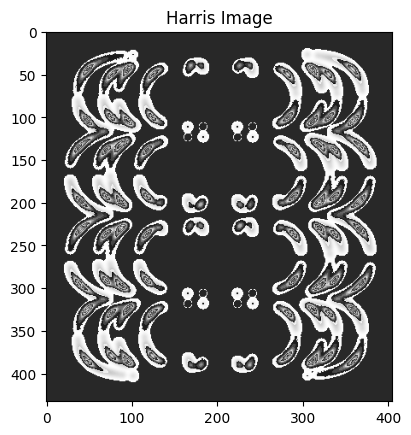

In [5]:
plt.title('Original Image')
plt.imshow(amg, cmap='gray')
plt.show()

bmg = Harris(amg)

plt.title('Harris Image')
plt.imshow(bmg, cmap='gray')
plt.show()

##  Homework 11b

#### 1.  Create an image with frame size (512,512). Place in this image a solid black circle with a radius of 50 at location (200,200). Place another solid circle with a radius of 50 at location (350,350). Compute the Correlate2D transform of the two images.

In [6]:
import scipy.fftpack as ft

def Correlate2D(A, B):
    a = ft.fft2(A)
    b = ft.fft2(B)
    c = a * b.conjugate( )
    C = ft.ifft2(c)
    C = ft.fftshift(C)
    return C

In [7]:
def Circle(size, loc, rad):
    """frame, center, radius size is (v,h) of size of array loc is (v,h) of circle location
    rad is integer of radius returns array with a solid circle"""
    b1,b2 = np.indices(size)
    b1,b2 = b1-loc[0], b2-loc[1]
    mask = b1*b1 + b2*b2
    mask = (mask <= rad*rad).astype(int)
    return mask

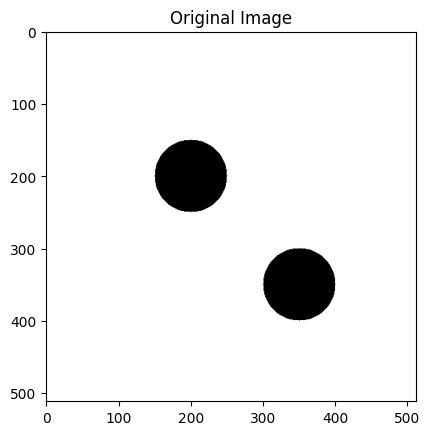

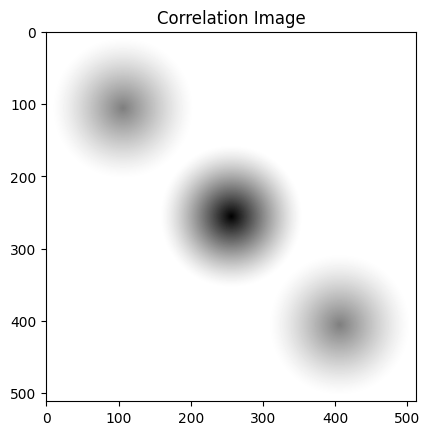

In [18]:
adata = np.ones((512,512))
adata -= Circle((512,512),(200,200),50)
adata -= Circle((512,512),(350,350),50)

#display(adata[200:205,200:205])

plt.title('Original Image')
plt.imshow(adata, cmap='gray')
plt.show()

bdata = Correlate2D(adata, adata)

plt.title('Correlation Image')
plt.imshow(-(np.sqrt(abs(bdata))), cmap='gray')
plt.show()

#### 2.  Describe your results

The resulting image is kind of odd. The things that have stayed the same after autocorrelation are the size of the image, and that it's mostly white space. What is odd is the fact that there are now 3 objects instead of two. It seems as long as there is one circle, the middle of the resulting correlation in image form will have a dark spot in the shape of a circle in the middle. The two other spots one in the upper left and lower right seem to be placed at approximately (100,100) and (400,400) which is odd since there is nothing in those locations in the original image and these are obviously not the centers of either original circle.